In [6]:
import sys
sys.path.append('/data/vision/beery/scratch/neha/micromamba/envs/datacomp/lib/python3.11/site-packages')
import numpy as np
# import pandas as pd
import torch
import torchvision 
from transformers import CLIPProcessor, CLIPModel
from all_datasets.COOS_dataset import COOSDataset
from transformers import AutoImageProcessor, AutoModel,AutoModelForImageClassification
from torch.utils.data import DataLoader, Dataset
from torch.nn import CrossEntropyLoss
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
import timm
import clip
from all_datasets.FMoW_dataset import FMoWDataset

In [2]:
pool_centroids = torch.from_numpy(
        torch.load('all_datasets/COOS/centroids/COOS_val1_centroids.npy'))

In [ ]:
pool_centroids.shape

In [ ]:
np.load(npz_file['COOS_val1_centroids/data.pkl'],allow_pickle=True)

In [ ]:
class_mapping = {0:'Endoplasmic Reticulum',
                1:'Inner Mitochondrial Membrane',
                2:'Golgi',
                3:'Peroxisomes',
                4:'Early Endosome',
                5:'Cytosol',
                6:'Nuclear Envelope'}

In [12]:


subset_path="experiments/FMoW/no_filter/subset.npy"
dataset=FMoWDataset(split='test1',subset_path=subset_path,transform=None)
# dataset.data
print(np.load(subset_path,allow_pickle=True))
# get_features(dataset)

['train_i' 'train_i' 'train_i' ... 'train_i' 'train_i' 'train_i']


In [9]:
# clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
# clip_model.visual_projection = nn.Linear(in_features=clip_model.visual_projection.in_features, out_features=7)

# # make sure to use the appropriate image mean, std and interpolation
# # of the inference processor
# # mean = [0.485, 0.456, 0.406]
# # std = [0.229, 0.224, 0.225]
# # mean=[0.456]
# # std=[0.224]
# # preprocess = transforms.Compose([
# #           transforms.ToTensor(),
# #           transforms.Resize(size=248, max_size=None, antialias=True),#'bicubic'
# #           transforms.CenterCrop(size=(224, 224)),
# #           transforms.Normalize(mean=torch.tensor([0.4560]), std=torch.tensor([0.2240]))
# # ])
# # model = timm.create_model('vit_small_patch16_224.dino', pretrained=True)
# # model = model.train()
# # data_config = timm.data.resolve_model_data_config(model)
# dataset = COOSDataset('test1')
# train_dataloader = DataLoader(dataset,batch_size=64)


<class 'numpy.ndarray'> (64, 64)


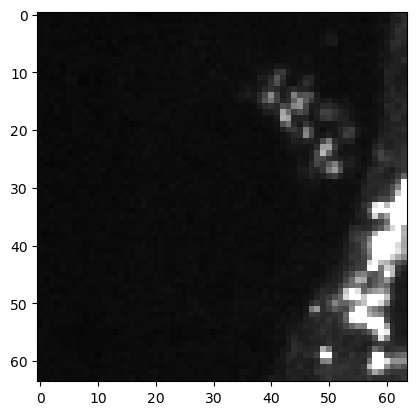

In [41]:
import matplotlib.pyplot as plt
filepath='/data/vision/beery/scratch/neha/task-datacomp/all_datasets/COOS/data/val4_data.h5'
data_file=h5py.File(filepath, 'r')
image=data_file['data'][0][0,:,:]
print(type(image),image.shape)
image=Image.fromarray(image)
plt.imshow(image)
# preprocess(image)

In [53]:
np.load('/data/vision/beery/scratch/neha/task-datacomp/experiments/FMoW/clip_score_0.1/subset.npy',allow_pickle=True)

array(['train_i', 'train_i', 'train_i', ..., 'train_i', 'train_i',
       'train_i'], dtype='<U7')

In [52]:
import os
import clip
import torch

import numpy as np
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100
from tqdm import tqdm
import h5py
from PIL import Image




# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)


train = FMoWDataset('train',transform=preprocess,subset_path='/data/vision/beery/scratch/neha/task-datacomp/experiments/FMoW/clip_score_0.1/subset.npy')
test = FMoWDataset('test1',transform=preprocess,subset_path=None)

# train = COOSDataset1('train',transform=preprocess)
# test = COOSDataset1('test4',transform=preprocess)


def get_features(dataset):
    all_features = []
    all_labels = []
    
    with torch.no_grad():
        for images,_, labels,_ in tqdm(DataLoader(dataset, batch_size=100)):
            features = model.encode_image(images.to(device))

            all_features.append(features)
            all_labels.append(labels)

    return torch.cat(all_features).cpu().numpy(), torch.cat(all_labels).cpu().numpy()

# Calculate the image features
train_features, train_labels = get_features(train)
test_features, test_labels = get_features(test)

# Perform logistic regression
classifier = LogisticRegression(random_state=0, C=0.316, max_iter=1000, verbose=1)
classifier.fit(train_features, train_labels)

# Evaluate using the logistic regression classifier
predictions = classifier.predict(test_features)
accuracy = np.mean((test_labels == predictions).astype(float)) * 100.
print(f"Accuracy = {accuracy:.3f}")

0it [00:00, ?it/s]


RuntimeError: torch.cat(): expected a non-empty list of Tensors

In [ ]:
predicted_labels

In [ ]:
clip_model(**inputs)